# Construção de campos speckles

Ademais aos feixes ópticos construídos facilmente pelos métodos anteriormente apresentados, podemos computar speckles de luz. Primeiramente, no entanto, faremos novamente aqui algumas pré-definições para a execução das células no código.

In [1]:
# retornar sem mensagens (-q = quiet) ao diretório raíz
%cd -q ../../../

# importa o módulo beam dessa biblioteca
import optical.beam as beam
# módulo numpy: utilizado na construção e controle de matrizes
import numpy as np
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

# construção da região simulada do espaço
x = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo x
y = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo y

X, Y = np.meshgrid(x, y);           # malha de pontos do plano X, Y

# definição dos layouts dos gráficos
intensityLayout = go.Layout(
    title = 'Intensidade',
    title_x = 0.5,                  # texto centralizado na horizontal
    xaxis = dict(title = 'x(μm)'),  # legenda do eixo x
    yaxis = dict(title = 'y(μm)'),  # legenda do eixo y
    width = 900,                    # comprimento da imagem
    height = 850                    # altura da imagem
);
phaseLayout = go.Layout(
    title = 'Fase',
    title_x = 0.5,                  # texto centralizado na horizontal
    xaxis = dict(title = 'x(μm)'),  # legenda do eixo x
    yaxis = dict(title = 'y(μm)'),  # legenda do eixo y
    width = 900,                    # comprimento da imagem
    height = 850                    # altura da imagem
);

## Campos speckles

Um speckle consiste num fenômeno óptico de aparência granular causado pela interferência de luz (comumente luz laser) espalhada em direções aleatórias. Para gerar um campo speckle de luz podemos criar um campo com fase aleatória e propagá-lo *ad infinitum* (via transformada de Fourier).

In [2]:
# importa a transformada de fourier
from scipy.fftpack import fft2

# cria uma matriz aleatoria do tamanho da malha no plano transverso
random_phase = 2.0 * np.pi * np.random.rand(len(x), len(y));

speckle = fft2(                     # propagação ad infinitum
    beam.createG(                   # de um feixe gaussiano
        w0 = 10.0,
        region = (X, Y),
        phase = random_phase
    )
);

### Perfil transversal de intensidade

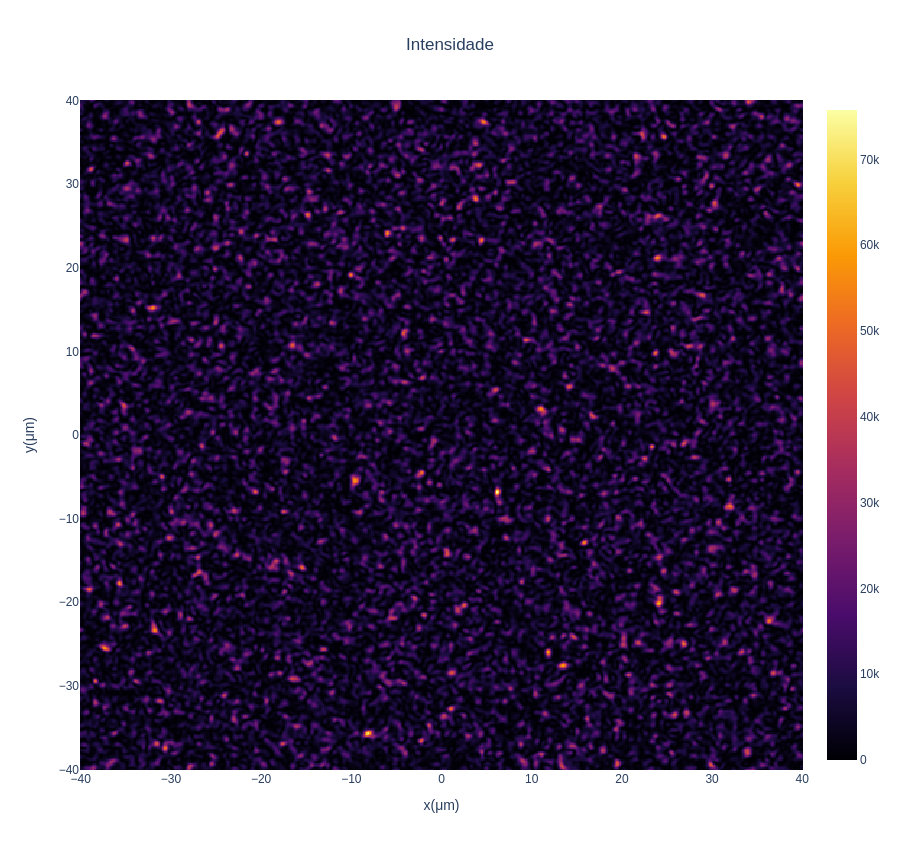

In [3]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(speckle) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

### Perfil transversal de fase

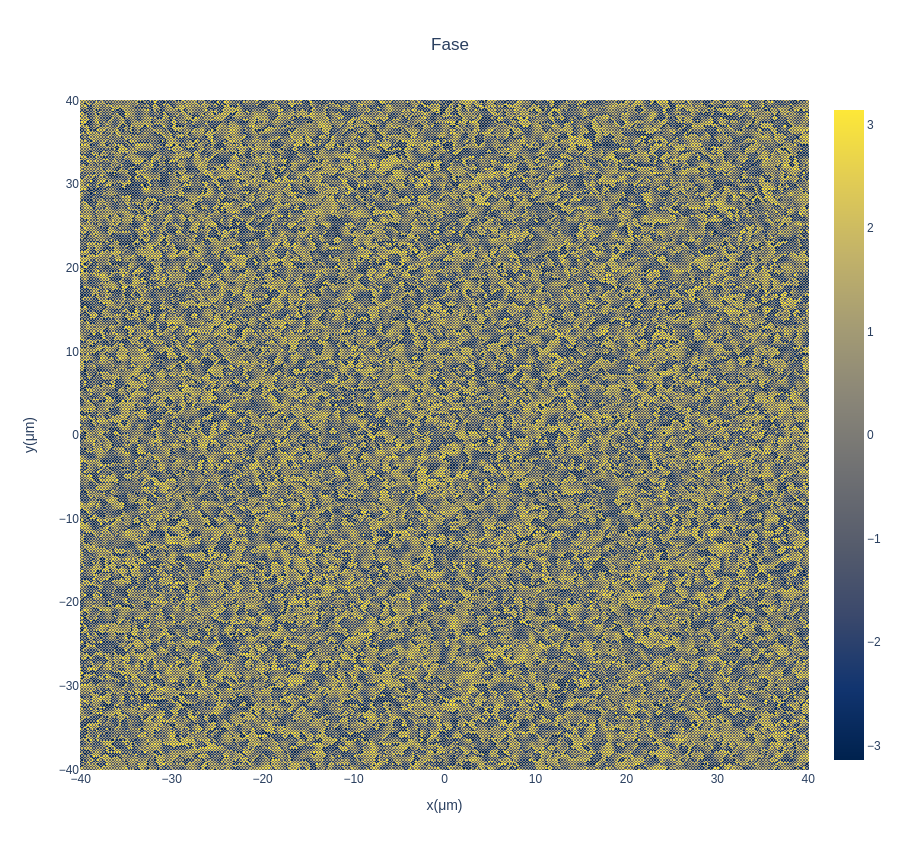

In [4]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(speckle),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases